In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
computers = pd.read_csv("data/computers.csv")

In [4]:
computers

,Units,Minutes
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74
5,5,87
6,6,96
7,6,97
8,7,109
9,8,119


In [7]:
mean_value = computers.Minutes.mean()

Text(0,0.5,'Minutes')

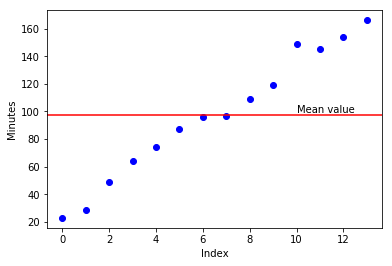

In [8]:
plt.plot(computers.Minutes,'bo')
plt.axhline(y=mean_value,c="r")
plt.annotate("Mean value",xy = (10,mean_value+2))
plt.xlabel("Index")
plt.ylabel("Minutes")


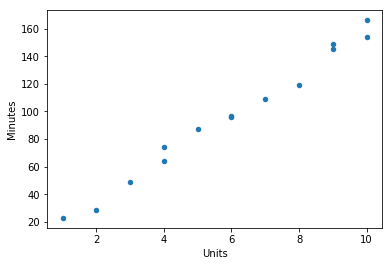

In [9]:
computers.plot(kind="scatter",x="Units",y="Minutes")

In [10]:
minutes_model0 = computers.Minutes.mean()
minutes_model1 = 10 + 12*computers.Units
minutes_model2 = 6 + 18*computers.Units
computers['min_model0'] = minutes_model0
computers['min_model1'] = minutes_model1
computers['min_model2'] = minutes_model2

In [12]:
computers

,Units,Minutes,min_model0,min_model1,min_model2
0,1,23,97.214286,22,24
1,2,29,97.214286,34,42
2,3,49,97.214286,46,60
3,4,64,97.214286,58,78
4,4,74,97.214286,58,78
5,5,87,97.214286,70,96
6,6,96,97.214286,82,114
7,6,97,97.214286,82,114
8,7,109,97.214286,94,132
9,8,119,97.214286,106,150


Text(0.5,1,'Speculated Models')

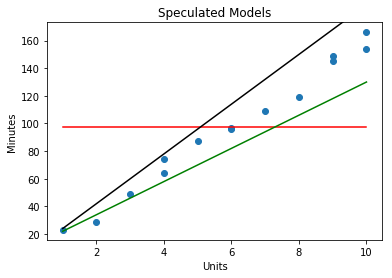

In [13]:
fig,ax = plt.subplots()
ax.scatter(x="Units",y="Minutes",data=computers)
ax.add_line(plt.Line2D(computers.Units,computers.min_model0,color="red"))
ax.add_line(plt.Line2D(computers.Units,computers.min_model1,color="green"))
ax.add_line(plt.Line2D(computers.Units,computers.min_model2,color="black"))
ax.set_ylabel("Minutes")
ax.set_xlabel("Units")
ax.set_title("Speculated Models")

In [14]:
model0_obs = pd.DataFrame(np.array([computers.Units,
              computers.Minutes,
              computers.min_model0,
              computers.min_model0 - computers.Minutes]).T,
              columns=["Units", "Actual time", "Predicted time", "Error"])

In [15]:
model0_obs

,Units,Actual time,Predicted time,Error
0,1.0,23.0,97.214286,74.214286
1,2.0,29.0,97.214286,68.214286
2,3.0,49.0,97.214286,48.214286
3,4.0,64.0,97.214286,33.214286
4,4.0,74.0,97.214286,23.214286
5,5.0,87.0,97.214286,10.214286
6,6.0,96.0,97.214286,1.214286
7,6.0,97.0,97.214286,0.214286
8,7.0,109.0,97.214286,-11.785714
9,8.0,119.0,97.214286,-21.785714


In [17]:
sum(model0_obs.Error)

1.4210854715202004e-14

In [18]:
sum(model0_obs.Error**2)

27768.357142857145

In [19]:
import math
math.sqrt(sum(model0_obs.Error**2))

166.63840236529256

In [20]:
model1_obs = pd.DataFrame(np.array([computers.Units,
              computers.Minutes,
              computers.min_model1,
              computers.min_model1 - computers.Minutes]).T,
              columns=["Units", "Actual time", "Predicted time", "Error"])

In [21]:
model1_obs

,Units,Actual time,Predicted time,Error
0,1,23,22,-1
1,2,29,34,5
2,3,49,46,-3
3,4,64,58,-6
4,4,74,58,-16
5,5,87,70,-17
6,6,96,82,-14
7,6,97,82,-15
8,7,109,94,-15
9,8,119,106,-13


In [22]:
sum(model1_obs.Error**2)

4993

In [23]:
model2_obs = pd.DataFrame(np.array([computers.Units,
              computers.Minutes,
              computers.min_model2,
              computers.min_model2 - computers.Minutes]).T,
              columns=["Units", "Actual time", "Predicted time", "Error"])

In [24]:
model2_obs

,Units,Actual time,Predicted time,Error
0,1,23,24,1
1,2,29,42,13
2,3,49,60,11
3,4,64,78,14
4,4,74,78,4
5,5,87,96,9
6,6,96,114,18
7,6,97,114,17
8,7,109,132,23
9,8,119,150,31


In [25]:
sum(model2_obs.Error**2)

5001

In [26]:
len(computers)

14

4.161654135338296 15.508771929824569


In [31]:
min_best_fit_model = b0 + b1*computers.Units
computers['min_best_fit_model'] = min_best_fit_model

In [32]:
computers.loc[:,["Units","Minutes","min_best_fit_model"]]

,Units,Minutes,min_best_fit_model
0,1,23,19.670426
1,2,29,35.179198
2,3,49,50.687970
3,4,64,66.196742
4,4,74,66.196742
5,5,87,81.705514
6,6,96,97.214286
7,6,97,97.214286
8,7,109,112.723058
9,8,119,128.231830


Text(0.5,1,'Best fit model line')

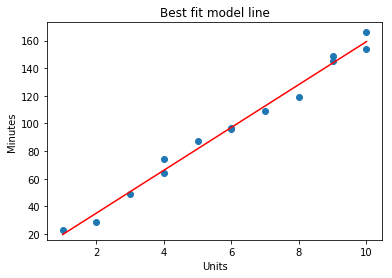

In [33]:
fig,ax = plt.subplots()
ax.scatter(x="Units",y="Minutes",data=computers)
ax.add_line(plt.Line2D(computers.Units,computers.min_best_fit_model,color="red"))
ax.set_ylabel("Minutes")
ax.set_xlabel("Units")
ax.set_title("Best fit model line")

In [34]:
best_fit_model_obs = pd.DataFrame(np.array([computers.Units,
              computers.Minutes,
              computers.min_best_fit_model,
              computers.min_best_fit_model - computers.Minutes]).T,
              columns=["Units", "Actual time", "Predicted time", "Error"])

In [35]:
best_fit_model_obs

,Units,Actual time,Predicted time,Error
0,1.0,23.0,19.670426,-3.329574
1,2.0,29.0,35.179198,6.179198
2,3.0,49.0,50.687970,1.687970
3,4.0,64.0,66.196742,2.196742
4,4.0,74.0,66.196742,-7.803258
5,5.0,87.0,81.705514,-5.294486
6,6.0,96.0,97.214286,1.214286
7,6.0,97.0,97.214286,0.214286
8,7.0,109.0,112.723058,3.723058
9,8.0,119.0,128.231830,9.231830


In [42]:
sd=((math.sqrt(sum(best_fit_model_obs.Error**2)))/14)
print("confidence interval is +/-"+str(2*sd)+ " with 95% assurity")

confidence interval is +/-2.6682118560415655 with 95% assurity


In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
model = LinearRegression()
model.fit(X = computers.loc[:,["Units"]], y= computers.loc[:,["Minutes"]])
print("Intercept:", model.intercept_)
print("Coefficients:",model.coef_)

Intercept: [4.16165414]
Coefficients: [[15.50877193]]


In [46]:
#Adding an intercept term using np.ones()
X = np.matrix([np.ones(computers.shape[0]),computers["Units"]]).T
y = np.matrix(computers["Minutes"]).reshape(-1,1)

In [47]:
beta = (np.linalg.pinv(X.T*X)*X.T)*y

In [48]:
beta

matrix([[ 4.16165414],
        [15.50877193]])

## Gradient Descent implementation

In [34]:
def gradient(X,y,beta):
    m = y.shape[0] #m represents the total number of instances
    gradient = (1/m)*(X.T.dot((X * beta) - y))
    return gradient

def gradient_descent(X,y,alpha,beta,max_iter):
    for i in range(1,max_iter+1):
        beta = beta - (alpha*gradient(X,y,beta))
    return beta.T

In [35]:
beta_initial = np.zeros((X.shape[1],1))
alpha = 0.01
max_iter=10000
X = np.matrix([np.ones(computers.shape[0]),computers["Units"]]).T
y = np.matrix(computers["Minutes"]).reshape(-1,1)

In [36]:
beta_final = gradient_descent(X,y,alpha,beta=beta_initial,max_iter=max_iter)
beta_final

matrix([[ 4.16165411, 15.50877193]])

In [37]:
iters = [1,10,100,1000,2000,5000,8000,9000]
def gradient_descent_monitoring(X,y,alpha,beta,max_iter):
    for i in range(1,max_iter+1):
        beta = beta - (alpha*gradient(X,y,beta))
        if i in iters:
            print(i, beta.T)
    return beta.T

In [38]:
gradient_descent_monitoring(X,y,alpha,beta=beta_initial,max_iter=max_iter)

1 [[0.97214286 7.09571429]]
10 [[ 2.18463822 15.73759382]]
100 [[ 2.48690695 15.73734524]]
1000 [[ 3.83399204 15.553492  ]]
2000 [[ 4.10817574 15.51607078]]
5000 [[ 4.16142163 15.50880366]]
8000 [[ 4.16165312 15.50877207]]
9000 [[ 4.16165397 15.50877195]]


matrix([[ 4.16165411, 15.50877193]])

#### Solution to gradient descent exercise

In [39]:
def gradient_descent_tol(X,y,alpha,beta,max_iter,tol=1e-5):
    for i in range(1,max_iter+1):
        if np.all(np.abs(alpha*gradient(X,y,beta)) < tol):
            print(i)
            break
        else:
            beta = beta - (alpha*gradient(X,y,beta))
    return beta.T

In [40]:
gradient_descent_tol(X,y,alpha=0.01,beta=beta_initial,max_iter=max_iter,tol=1e-4)
gradient_descent_tol(X,y,alpha=0.03,beta=beta_initial,max_iter=max_iter,tol=1e-4)
gradient_descent_tol(X,y,alpha=0.1,beta=beta_initial,max_iter=max_iter,tol=1e-4)
gradient_descent_tol(X,y,alpha=0.001,beta=beta_initial,max_iter=max_iter,tol=1e-4)

1984
863
7128


matrix([[ 3.60950047, 15.58413112]])

In [41]:
model = LinearRegression(normalize=True)
model.fit(computers[["Units"]],y)
print(model.intercept_)
print(model.coef_)

[4.16165414]
[[15.50877193]]


In [42]:
model.predict(5)

array([[81.70551378]])

## Coefficient of Determination

In [52]:
SST = sum((computers.Minutes.mean() - computers.Minutes)**2)
SST

27768.357142857145

In [53]:
SSE = sum(best_fit_model_obs.Error**2)
SSE

348.848370927318

In [54]:
SSR = SST - SSE
SSR

27419.508771929828

In [55]:
Rsq = SSR/SST
Rsq

0.9874371980620736

In [56]:
Rsq1 = model.score(computers[["Units"]],y)
Rsq1

0.9874371980620736